In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings

In [2]:
#The below code is used to load the dataset.
data = pd.read_excel('IND.xlsx')
data

,Year,GDP(billions),Human Development Index,Inflation Index,Credit Transfers (in million),Direct Debits (in million),Cheques (in million),Card & e-money (in million),Total digital-payments
0,2012,1827.64,0.600,108.983,518,177,1313,947,1642
1,2013,1856.72,0.607,119.227,915,193,1257,1279,2387
2,2014,2039.13,0.616,126.142,1457,230,1197,1760,3447
3,2015,2103.59,0.624,132.323,2874,289,1096,2736,5899
4,2016,2294.12,0.636,138.278,3858,365,1207,5497,9720
5,2017,2651.46,0.640,143.259,5879,379,1171,8258,14516
6,2018,2701.11,0.642,148.171,11854,534,1124,10839,23227
7,2019,2870.50,0.645,155.227,18486,826,1070,12313,31625


In [3]:
%matplotlib inline

In [4]:
corr = data.corr().iloc[0:9,0:9]
corr

,Year,GDP(billions),Human Development Index,Inflation Index,Credit Transfers (in million),Direct Debits (in million),Cheques (in million),Card & e-money (in million),Total digital-payments
Year,1.000000,0.980892,0.977259,0.994320,0.896983,0.910004,-0.830202,0.966355,0.939568
GDP(billions),0.980892,1.000000,0.949142,0.960690,0.900262,0.901306,-0.750745,0.984692,0.948897
Human Development Index,0.977259,0.949142,1.000000,0.982180,0.789434,0.818752,-0.790220,0.914561,0.853815
Inflation Index,0.994320,0.960690,0.982180,1.000000,0.864751,0.885927,-0.854126,0.935953,0.907768
Credit Transfers (in million),0.896983,0.900262,0.789434,0.864751,1.000000,0.990114,-0.742090,0.939454,0.989862
Direct Debits (in million),0.910004,0.901306,0.818752,0.885927,0.990114,1.000000,-0.758582,0.930709,0.980693
Cheques (in million),-0.830202,-0.750745,-0.790220,-0.854126,-0.742090,-0.758582,1.000000,-0.708750,-0.739843
Card & e-money (in million),0.966355,0.984692,0.914561,0.935953,0.939454,0.930709,-0.708750,1.000000,0.978592
Total digital-payments,0.939568,0.948897,0.853815,0.907768,0.989862,0.980693,-0.739843,0.978592,1.000000


In [5]:
X= data[['Total digital-payments']].values
y=data[['GDP(billions)']].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# importing regression algorithm as lr

In [8]:
lr.fit(X, y)

LinearRegression()

In [9]:
# Prediction
X = data[['Total digital-payments']]
y = data[['GDP(billions)']]

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree = 2)), ("mode", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X, y)
ypipe = pipe.predict(X)

ypipe[0:10]

array([[1759.45483974],
       [2011.63797543],
       [2252.63328795],
       [2590.08518116],
       [2214.56516865],
       [2347.68337999],
       [2505.10982913],
       [2663.10033794]])

In [10]:
#Fit the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

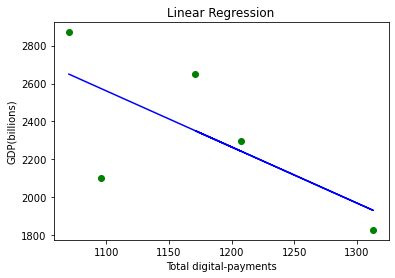

In [11]:
# Visualise the Linear Regression Result
plt.scatter(X_train, y_train, color = 'green') 
  
plt.plot(X_train, LinReg.predict(X_train), color = 'blue') 
plt.title('Linear Regression') 
plt.xlabel('Total digital-payments') 
plt.ylabel('GDP(billions)') 
  
plt.show()

In [12]:
# Add the polynomial term to the equation/model
from sklearn.preprocessing import PolynomialFeatures 
  
polynom = PolynomialFeatures(degree = 2) 
X_polynom = polynom.fit_transform(X_train) 
  
X_polynom

array([[1.000000e+00, 1.070000e+03, 1.144900e+06],
       [1.000000e+00, 1.096000e+03, 1.201216e+06],
       [1.000000e+00, 1.313000e+03, 1.723969e+06],
       [1.000000e+00, 1.171000e+03, 1.371241e+06],
       [1.000000e+00, 1.207000e+03, 1.456849e+06]])

In [13]:
#Fit the Polynomial Regression Model 
PolyReg = LinearRegression() 
PolyReg.fit(X_polynom, y_train)

LinearRegression()

### Drawing a Polynomial Curve

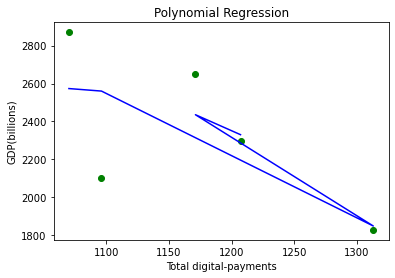

In [14]:
# Visualise the Polynomial Regression Results 
plt.scatter(X_train, y_train, color = 'green') 
  
plt.plot(X_train, PolyReg.predict(polynom.fit_transform(X_train)), color = 'blue') 
plt.title('Polynomial Regression') 
plt.xlabel('Total digital-payments') 
plt.ylabel('GDP(billions)') 
  
plt.show()

In [15]:
#Predicted Height from test dataset w.r.t Simple Linear Regression
y_predict_slr = LinReg.predict(X_test)

#Model Evaluation using R-Square for Simple Linear Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error associated with Simple Linear Regression:', r_square)

R-Square Error associated with Simple Linear Regression: 0.6019722150507902


In [16]:
#Predicted Height from test dataset w.r.t Polynomial Regression
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))

#Model Evaluation using R-Square for Polynomial Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.4642741668123893


## linear regression 

In [17]:
# Predicting GDP based on Total digital-payments using Linear Regression 
LinReg.predict([[18639]])

array([[3924.09918466]])

## Polynomial regression 

In [18]:
# Predicting GDP based on total digital-payments using Polynomial Regression 
PolyReg.predict(polynom.fit_transform([[18639]]))

array([[548.75153648]])